In [9]:
import pandas as pd
import os

In [10]:
# Data loading
path = r'../data/processed/data_processed_v3_outliers_trated.csv'
alzheimer_df = pd.read_csv(path)

print(alzheimer_df.info())
alzheimer_df[47:52]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18304 entries, 0 to 18303
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       18304 non-null  int64  
 1   Week       18304 non-null  int64  
 2   Date       18304 non-null  object 
 3   Entity     18304 non-null  object 
 4   Epi_Year   18304 non-null  int64  
 5   M          18304 non-null  float64
 6   F          18304 non-null  float64
 7   New_Cases  18304 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.1+ MB
None


,Year,Week,Date,Entity,Epi_Year,M,F,New_Cases
47,2014,49,2014-12-01,Aguascalientes,2014,0.0,0.0,0.0
48,2014,50,2014-12-08,Aguascalientes,2014,0.0,1.0,1.0
49,2014,51,2014-12-15,Aguascalientes,2014,0.0,0.0,0.0
50,2014,52,2014-12-22,Aguascalientes,2014,0.0,0.0,0.0
51,2014,53,2014-12-29,Aguascalientes,2014,0.0,0.0,0.0


# Data by Male and Female

In [ ]:
df_NoAcum_MF = alzheimer_df.copy()
df_NoAcum_MF = df_NoAcum_MF.drop('New_Cases', axis=1)

# output_folder = '../data/processed/'
# filename = 'data_processed_v3_NoAcum_MF.csv'
# route = os.path.join(output_folder, filename)

# df_NoAcum_MF.to_csv(
#     route,
#     index=False,
#     encoding='utf-8'
# )

print(df_NoAcum_MF.info())
df_NoAcum_MF[47:52]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18304 entries, 0 to 18303
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      18304 non-null  int64  
 1   Week      18304 non-null  int64  
 2   Date      18304 non-null  object 
 3   Entity    18304 non-null  object 
 4   Epi_Year  18304 non-null  int64  
 5   M         18304 non-null  float64
 6   F         18304 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1001.1+ KB
None


,Year,Week,Date,Entity,Epi_Year,M,F
47,2014,49,2014-12-01,Aguascalientes,2014,0.0,0.0
48,2014,50,2014-12-08,Aguascalientes,2014,0.0,1.0
49,2014,51,2014-12-15,Aguascalientes,2014,0.0,0.0
50,2014,52,2014-12-22,Aguascalientes,2014,0.0,0.0
51,2014,53,2014-12-29,Aguascalientes,2014,0.0,0.0


# Data by Total Cases

In [ ]:
df_NoAcum_Total = alzheimer_df.copy()
df_NoAcum_Total.drop(['M', 'F'], axis=1, inplace=True)

# output_folder = '../data/processed/'
# filename = 'data_processed_v3_NoAcum_Total.csv'
# route = os.path.join(output_folder, filename)

# df_NoAcum_Total.to_csv(
#     route,
#     index=False,
#     encoding='utf-8'
# )

print(df_NoAcum_Total.info())
df_NoAcum_Total[47:52]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18304 entries, 0 to 18303
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       18304 non-null  int64  
 1   Week       18304 non-null  int64  
 2   Date       18304 non-null  object 
 3   Entity     18304 non-null  object 
 4   Epi_Year   18304 non-null  int64  
 5   New_Cases  18304 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 858.1+ KB
None


,Year,Week,Date,Entity,Epi_Year,New_Cases
47,2014,49,2014-12-01,Aguascalientes,2014,0.0
48,2014,50,2014-12-08,Aguascalientes,2014,1.0
49,2014,51,2014-12-15,Aguascalientes,2014,0.0
50,2014,52,2014-12-22,Aguascalientes,2014,0.0
51,2014,53,2014-12-29,Aguascalientes,2014,0.0


# National data by Total Cases

In [13]:
# Aggregate all entities by Year and Week
df_national = df_NoAcum_Total.groupby(['Year', 'Week', 'Date', 'Epi_Year'], as_index=False)['New_Cases'].sum()

# Verify the result
print(f"Original df shape: {df_NoAcum_Total.shape}")
print(f"National df shape: {df_national.shape}")
print(f"\nFirst rows of national df:")
print(df_national.head())

# Quick validation
print(f"\nValidation:")
print(f"Original unique Year-Week combinations: {df_NoAcum_Total[['Year', 'Week']].drop_duplicates().shape[0]}")
print(f"National df rows: {len(df_national)}")

def detect_and_cap_national_outliers(national_df, multiplier=3):
    df_result = national_df.copy()
    
    # Detect outliers in New_Cases
    Q1 = df_result['New_Cases'].quantile(0.25)
    Q3 = df_result['New_Cases'].quantile(0.75)
    IQR = Q3 - Q1
    
    if IQR > 0:
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        
        # Cap outliers
        df_result['New_Cases'] = df_result['New_Cases'].clip(lower, upper)
    
    return df_result

# Apply to national data
df_national = detect_and_cap_national_outliers(df_national, multiplier=1.5)

Original df shape: (18304, 6)
National df shape: (572, 5)

First rows of national df:
   Year  Week        Date  Epi_Year  New_Cases
0  2014     2  2014-01-06      2014        4.0
1  2014     3  2014-01-13      2014       29.0
2  2014     4  2014-01-20      2014       47.0
3  2014     5  2014-01-27      2014       35.5
4  2014     6  2014-02-03      2014       40.5

Validation:
Original unique Year-Week combinations: 572
National df rows: 572


In [ ]:
# output_folder = '../data/processed/'
# filename = 'data_processed_v3_National_NoAcum_Total.csv'
# route = os.path.join(output_folder, filename)

# df_national.to_csv(
#     route,
#     index=False,
#     encoding='utf-8'
# )

print(df_national.info())
df_national.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       572 non-null    int64  
 1   Week       572 non-null    int64  
 2   Date       572 non-null    object 
 3   Epi_Year   572 non-null    int64  
 4   New_Cases  572 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 22.5+ KB
None


,Year,Week,Date,Epi_Year,New_Cases
0,2014,2,2014-01-06,2014,9.8125
1,2014,3,2014-01-13,2014,29.0000
2,2014,4,2014-01-20,2014,47.0000
3,2014,5,2014-01-27,2014,35.5000
4,2014,6,2014-02-03,2014,40.5000


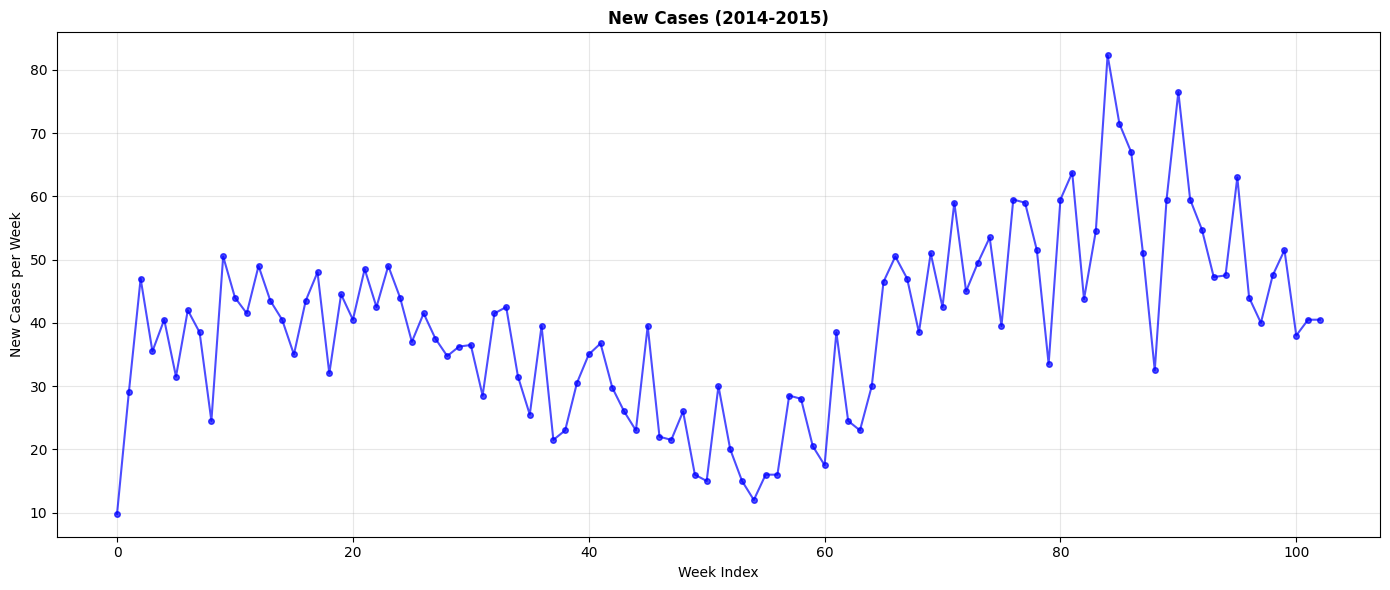

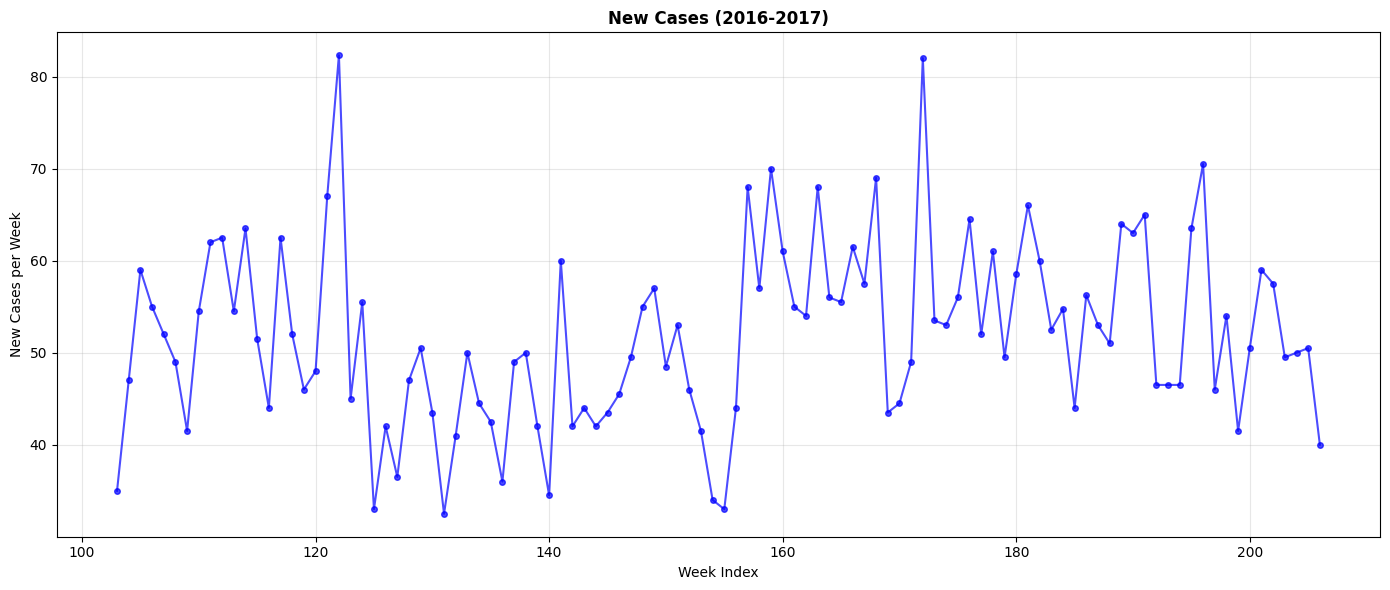

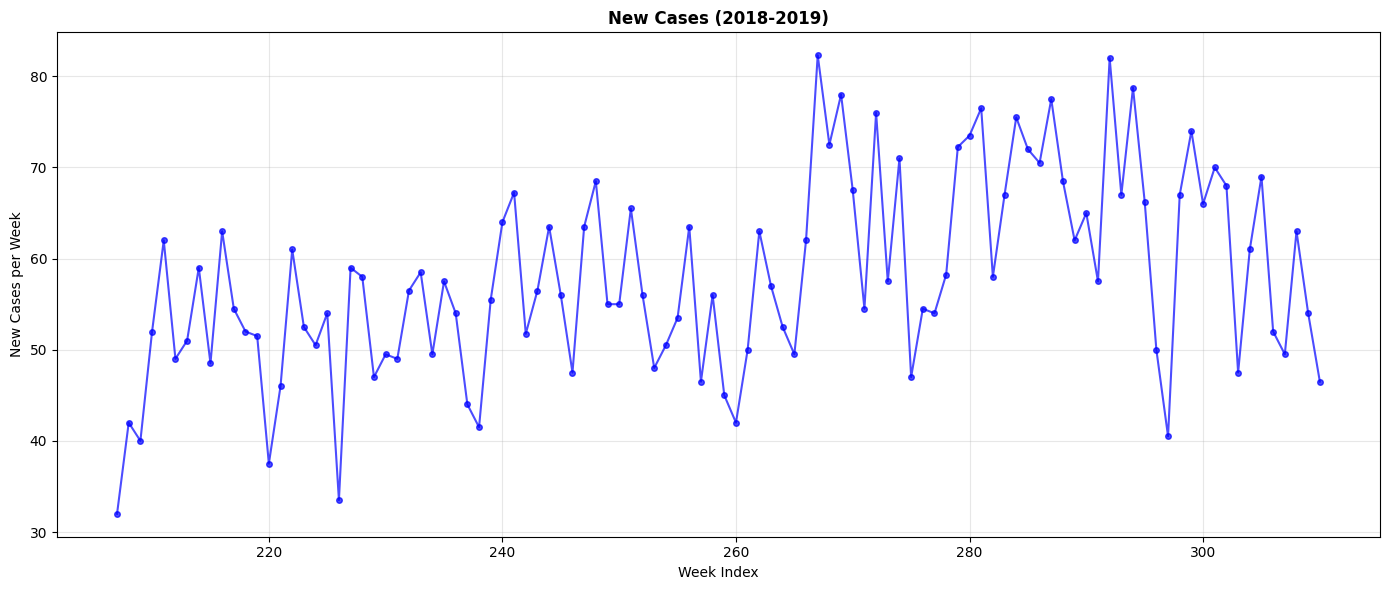

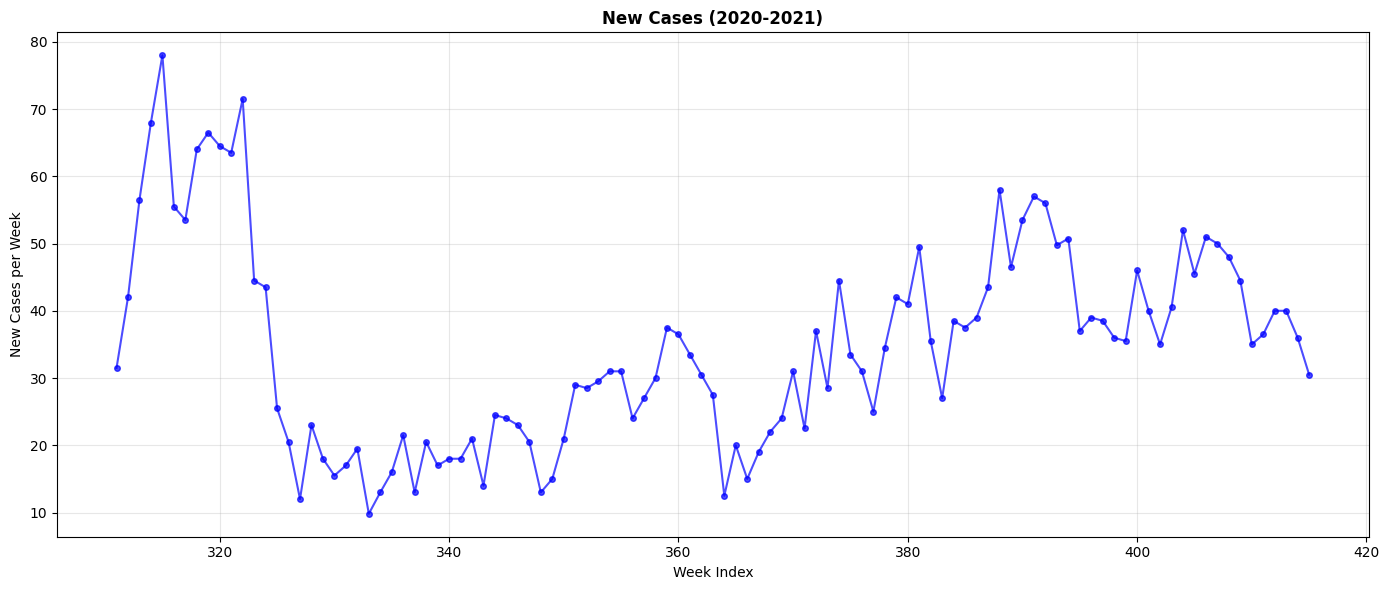

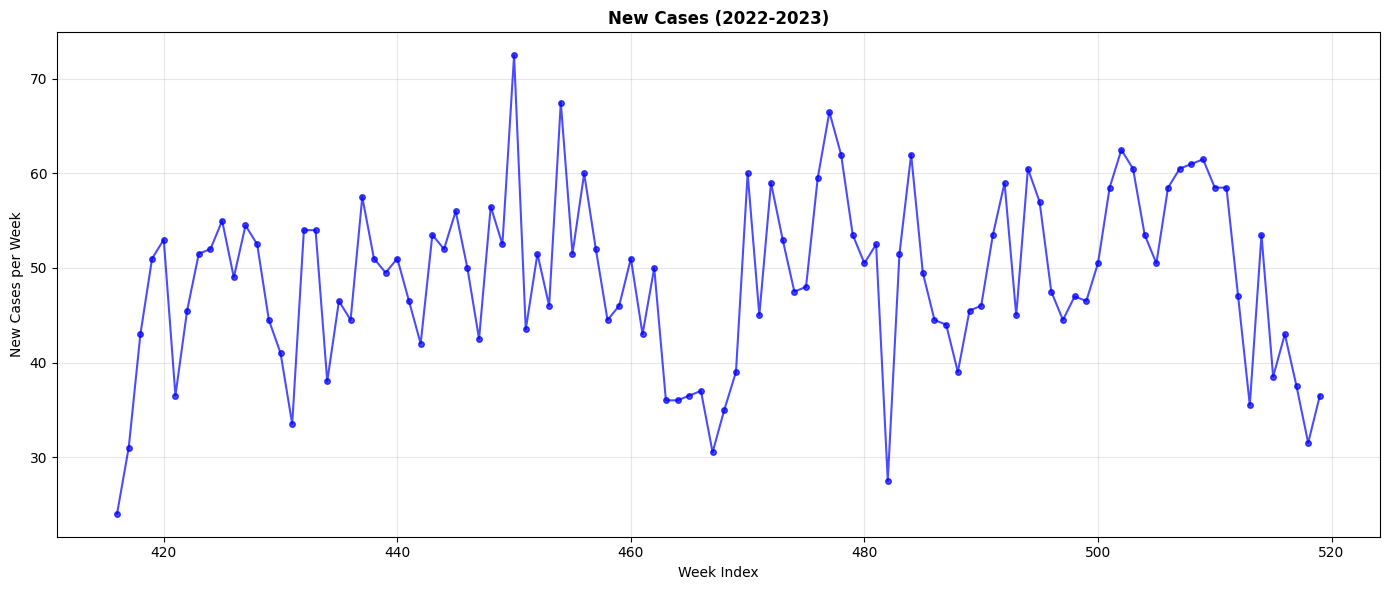

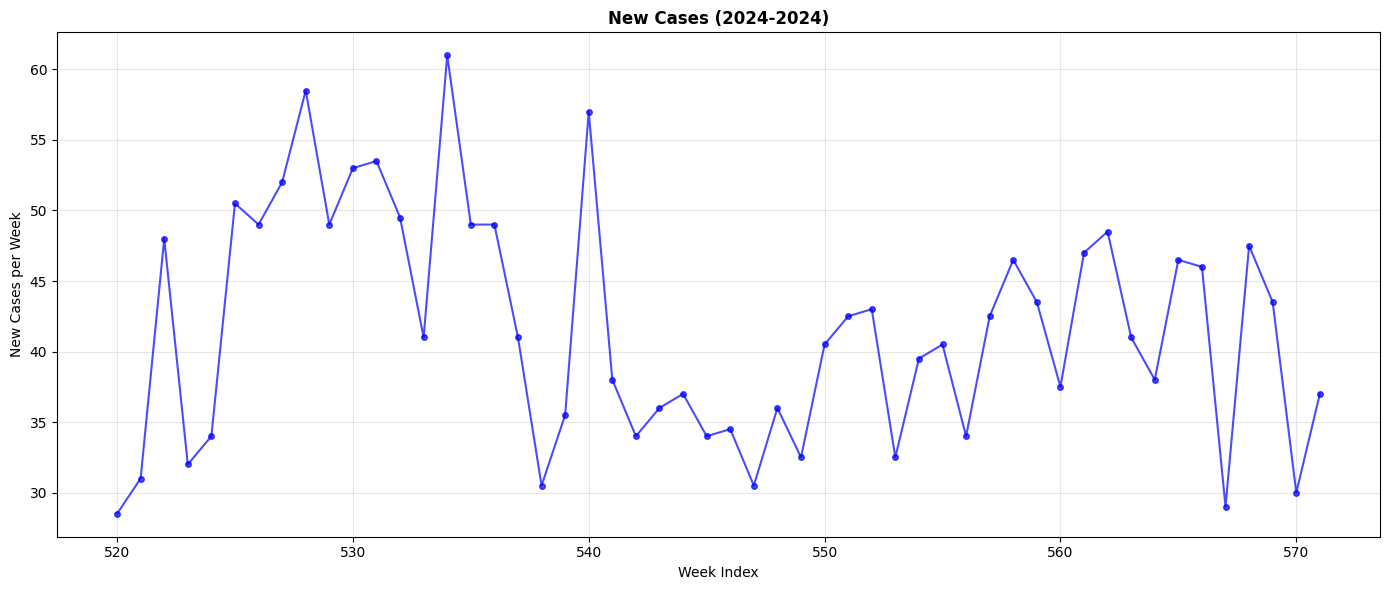

In [15]:
import matplotlib.pyplot as plt
def plot_new_cases(df, years_per_plot=2):
    df = df.sort_values(['Year', 'Week']).reset_index(drop=True)
    years = sorted(df['Year'].unique())
    periods = [years[i:i+years_per_plot] for i in range(0, len(years), years_per_plot)]
    
    for period in periods:
        period_data = df[df['Year'].isin(period)]
        
        fig, ax = plt.subplots(1, 1, figsize=(14, 6))
        ax.plot(period_data.index, period_data['New_Cases'], 'o-', 
                alpha=0.7, color='blue', markersize=4)
        
        ax.set_xlabel('Week Index')
        ax.set_ylabel('New Cases per Week')
        ax.set_title(f'New Cases ({period[0]}-{period[-1]})', weight='bold')
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


# Usage
plot_new_cases(df_national, years_per_plot=2)
